In [1]:
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, skeletonize, thin
from skimage.measure import find_contours
from commonfunctions import *
import lutils
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.feature import canny
from skimage.filters import gaussian
from matplotlib.pyplot import bar
from skimage.exposure import histogram
from skimage.color import rgb2gray
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
%matplotlib inline


[[0 0 0 1 0 0 0]
 [0 1 1 0 1 1 0]
 [0 1 0 0 0 1 0]
 [1 0 0 0 0 0 1]
 [0 1 0 0 0 1 0]
 [0 1 1 0 1 1 0]
 [0 0 0 1 0 0 0]]


In [2]:
def myHistogram(gray_image):
    hist = np.zeros(257)
    for i in gray_image:
        for j in i:
            hist[j] += 1
    return hist

In [3]:
def threshold(gray_image):
    margin = 30
    # imgHist = histogram(gray_image, nbins=256)[0].astype(np.uint8)
    imgHist = myHistogram(gray_image=gray_image)
    maxIndex = np.argmax(imgHist)

    indexleft = 0
    if maxIndex > margin:
        indexleft = np.argmax(imgHist[:maxIndex-margin])

    indexRight = 256
    if 256 - maxIndex > margin:
        indexRight = maxIndex + margin + np.argmax(imgHist[maxIndex+margin:255])

    if imgHist[indexleft] > imgHist[indexRight]:
        return indexleft + np.argmin(imgHist[indexleft:maxIndex])
    else:
        return maxIndex + np.argmin(imgHist[maxIndex:indexRight])

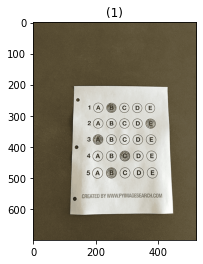

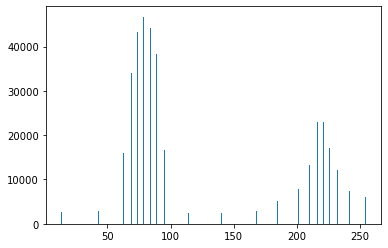

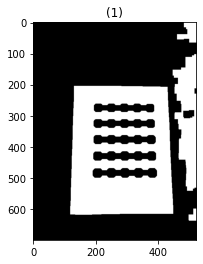

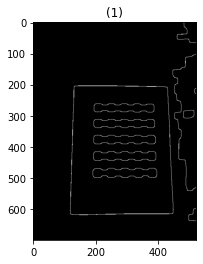

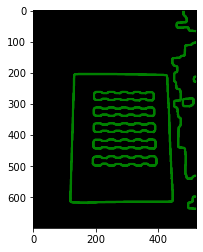

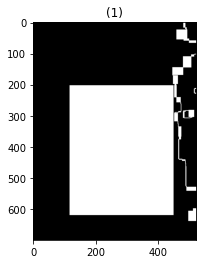

In [4]:
image = io.imread("imgs/7.png")

show_images([image])
orignal_image = image.copy()
#orignal_image = resize(orignal_image, (500 , 500))
#orignal_image = orignal_image.astype(float)

gray_image = np.round(rgb2gray(image)*256).astype(int)

showHist(gray_image)

th = threshold(gray_image)


gray_image = gray_image > th
dia_SE = np.ones((16, 16))
#Bluured_image  = gaussian(gray_image, sigma=1,  mode='nearest')
opening = binary_dilation(binary_erosion(gray_image, dia_SE), dia_SE)
closing = binary_erosion(binary_dilation(opening, dia_SE), dia_SE)
show_images([closing])
edged = canny(closing, sigma=3)
# show the original image and the edge detected image
show_images([edged])


bounding_boxes = find_contours(edged, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edged, cmap=plt.cm.gray)
blank = np.zeros(gray_image.shape)

for contour in bounding_boxes:
    x_diff = contour[:, 1].max() - contour[:, 1].min()
    y_diff = contour[:, 0].max() - contour[:, 0].min()
# #     print(x_diff,y_diff)
#     if( x_diff >= image.shape[1] // 5  or y_diff >= image.shape[0]//5 ):
# #       print('hi')
    for i in contour[:, 0]:
        for j in contour[:, 1]:
            # print(i,j)
            blank[int(i)][int(j)] = 1
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='green')
show_images([blank])


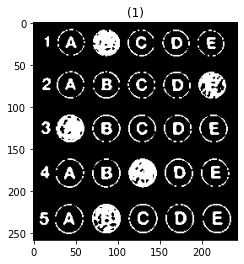

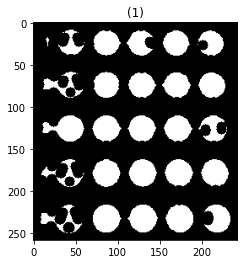

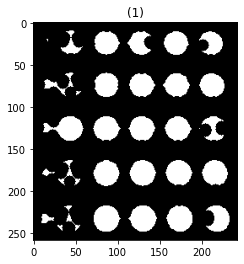

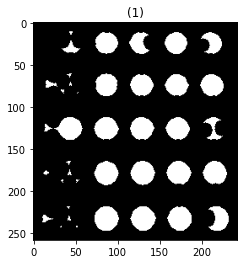

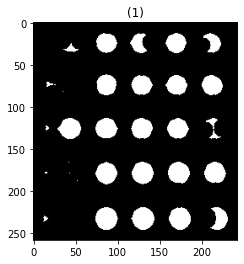

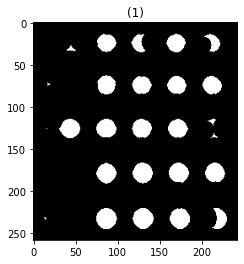

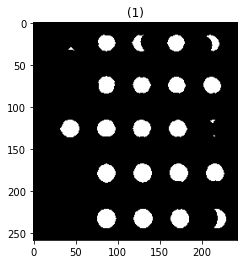

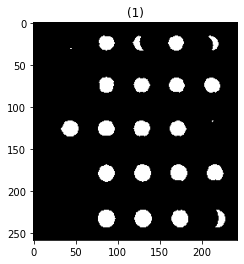

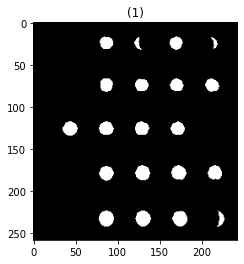

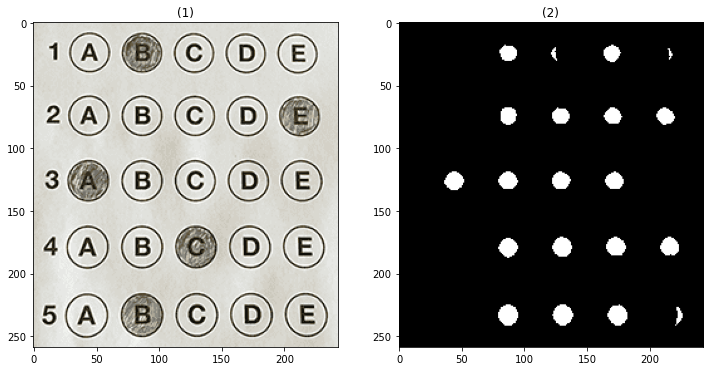

In [42]:
from skimage.morphology import opening, closing, diameter_closing, disk, erosion, dilation
from commonfunctions import *

def get_choices(img):
    hit, wid = img.shape[0], img.shape[1]
    # Scale the image in 0-255 scale then negate it.
    img = 255 - lutils.conv2_255(img)
    img = median(img)
    
    # Choice in white, Background in black.
    th = lutils.ptile(img, 85)
    
    img = np.where(img > th, 255, 0)
    
    # img = dilation(img, disk(5))
    
    # img = erosion(img, disk(10))
    for i in range(1, 10):
        show_images([img])
        img = dilation(img, disk(i + 4))
        img = erosion(img, disk(i + 5))
    
    #binary_dilation
    #binary_erosion
    #dilation(erosion(img, structure_element), structure_element)
    #img = closing(img, np.ones((1, wid)))
    return img

    return {'Q1': 'C', 'Q6': 'A', 'Q3': 'F'}


img = io.imread('imgs/8.png')
choices = get_choices(img)
show_images([img, choices])